In [16]:
import pandas as pd

In [17]:
import nltk
# nltk.download()

In [19]:
df = pd.read_csv('/Users/jz/Downloads/job_data/merge/data_job.csv')

In [20]:
df[['date','Reviews']] = df[['date','Reviews']].fillna(0)
df['date'] = df['date'].astype(int)

In [21]:
df.head()

,date,job_title,company,Reviews,location,desc
0,0,Machine Lubrication Analyst,"Coeur Mining, Inc.",0,Alaska,NaN
1,0,FILE CLERK,Mobile County Public Schools,184,"Mobile County, AL","The duties include but are not limited to:\n\nGeneral office duties (typing, copying, etc.)Files..."
2,0,Performance Improvement - Data Analyst,Yukon-Kuskokwim Health Corporation,0,"Bethel, AK 99559",NaN
3,0,Store Worker,US Department of Defense,"4,937","Redstone Arsenal, AL",NaN
4,0,Academic Tutor,AmeriCorps,"2,426",Alaska,NaN


In [22]:
df['desc'] = df['desc'].fillna(' ')

In [23]:
#df.to_csv('df.csv')

In [24]:
df_200 =  df

In [25]:
description = ""
for desc in df_200['desc']:
    description+= desc

In [26]:
description_list = []
for desc in df_200['desc']:
    description_list.append(desc)

In [27]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(description)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
bow_simple.most_common(10)


[(',', 1525504),
 ('and', 1430966),
 ('.', 848481),
 ('to', 781916),
 ('the', 658989),
 ('of', 574338),
 ('in', 380594),
 ('a', 362228),
 (':', 335865),
 ('with', 316127)]

In [28]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)


key = bow.most_common(200)

In [54]:
keywords = pd.DataFrame(pd.Series(bow.most_common(200),name='count'))

In [63]:
#keywords.to_csv('keywords.csv')

In [65]:
keywords_cleaned = pd.read_csv('keywords.csv')

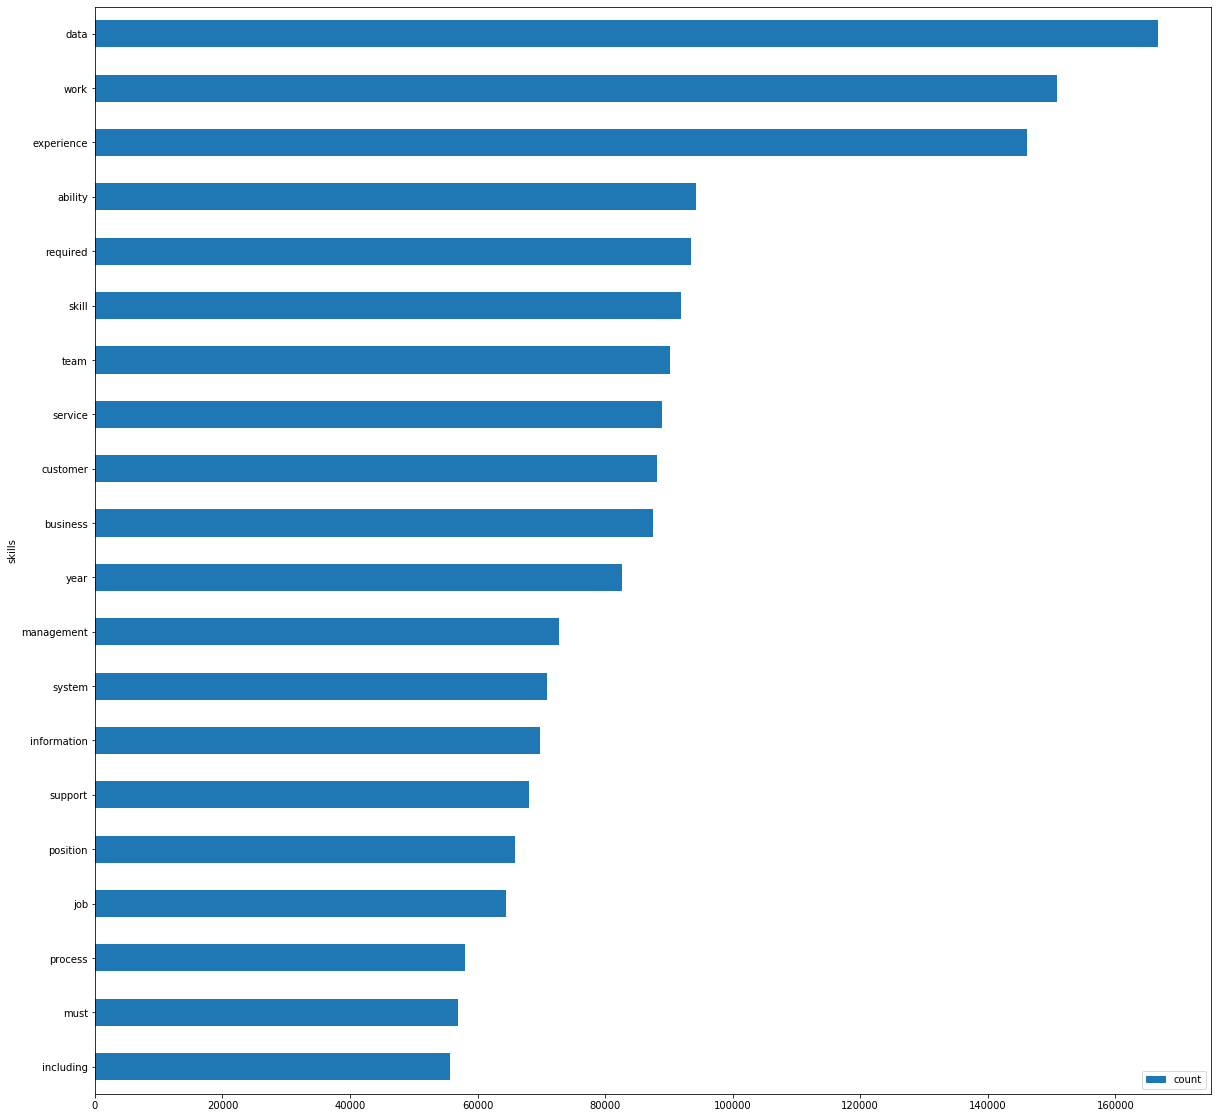

In [67]:
keywords_cleaned[:20].sort_index(axis=0, ascending=False).plot(kind='barh',x='skills', y='count', rot=0,figsize=(20,20))